A diamond is one of the most expensive stones. The price of diamonds varies irrespective of the size because of the factors affecting the price of a diamond.

Diamond Price Analysis

To analyze the price of diamonds according to their attributes, we first need to have a dataset containing diamond prices based on their features. I found ideal data on Kaggle containing information about diamonds like:

1. Carat
2. Cut
3. Colour
4. Clarity
5. Depth
6. Table
7. Price
8. Size

Importing the necessary Python libraries and the dataset:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

data = pd.read_csv("diamonds.csv")
print(data.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [3]:
#This dataset contains an Unnamed column. I will delete this column before moving further:
data = data.drop("Unnamed: 0",axis=1)

In [4]:
#I will first analyze the relationship between the carat and the price of the diamond to see how the number of carats affects the price of a diamond:

figure = px.scatter(data_frame = data, x="carat",
                    y="price", size="depth",
                    color= "cut", trendline="ols")
figure.show()

We can see a linear relationship between the number of carats and the price of a diamond. It means higher carats result in higher prices.

Now I will add a new column to this dataset by calculating the size (length x width x depth) of the diamond:

In [5]:
data["size"] = data["x"] * data["y"] * data["z"]
print(data)

       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

             size  
0       38.202030  

Now let’s have a look at the relationship between the size of a diamond and its price:

In [6]:
figure=px.scatter(data_frame=data, x="size", y="price", size="depth", color= "cut", trendline="ols")
figure.show()

The above figure concludes two features of diamonds:

1. Premium cut diamonds are relatively large than other diamonds
2. There’s a linear relationship between the size of all types of diamonds and their prices

Now let’s have a look at the prices of all the types of diamonds based on their colour:

In [7]:
figure=px.box(data_frame=data, x="cut", y="price", color= "cut")
figure.show()

Now let’s have a look at the prices of all the types of diamonds based on their clarity:

In [8]:
fig = px.box(data, x="cut", y="price", color="clarity")
fig.show()

Now let’s have a look at the correlation between diamond prices and other features in the dataset:

In [9]:
correlation = data.corr(numeric_only=True)
print(correlation["price"].sort_values(ascending=False))

price    1.000000
carat    0.921591
size     0.902385
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


Diamond Price Prediction

Now, I will move to the task of predicting diamond prices by using all the necessary information from the diamond price analysis done above.

Before moving forward, I will convert the values of the cut column as the cut type of diamonds is a valuable feature to predict the price of a diamond. To use this column, we need to convert its categorical values into numerical values. Below is how we can convert it into a numerical feature:

In [10]:
data["cut"] = data["cut"].map({"Ideal": 1, "Premium": 2, "Good": 3, "Very Good": 4, "Fair": 5})

Now, let’s split the data into training and test sets:

In [11]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["carat", "cut", "size"]])
y = np.array(data[["price"]])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

Now I will train a machine learning model for the task of diamond price prediction:

In [12]:
# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor()
# regressor.fit(xtrain, ytrain.ravel())

from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(xtrain, ytrain.ravel())

LinearRegression()

Now below is how we can use our machine learning model to predict the price of a diamond:

Example:
Carat Size = 0.60, Cut Type = 2, Size = 40

In [20]:
print("Diamond Price Prediction")
a = float(input("Carat Size: "))
b = int(input("Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): "))
c = float(input("Size: "))
features = np.array([[a, b, c]])
print("Predicted Diamond's Price = ", Regressor.predict(features))

Diamond Price Prediction
Predicted Diamond's Price =  [2316.33924265]


In [15]:
# Prediction result
y_pred_test = Regressor.predict(xtest)     # predicted value of y_test
y_pred_train = Regressor.predict(xtrain)   # predicted value of y_train

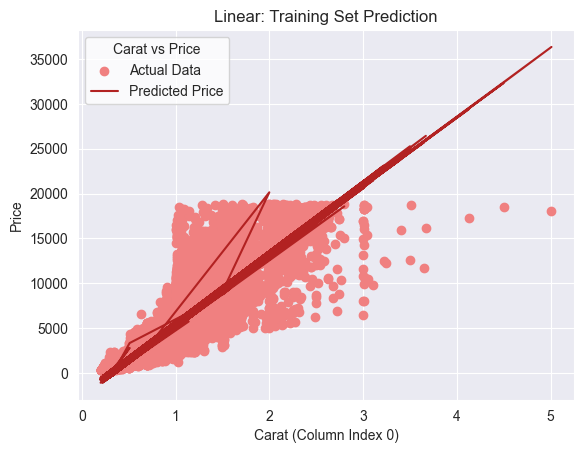

In [16]:
# Prediction on training set
plt.scatter(xtrain[:, 0], ytrain, color='lightcoral',label='Actual Data')
plt.plot(xtrain[:, 0], y_pred_train, color='firebrick', label='Predicted Price')
plt.legend(title='Carat vs Price', loc='best', facecolor='white')
plt.title('Linear: Training Set Prediction')
plt.xlabel('Carat (Column Index 0)')
plt.ylabel('Price')
plt.show()

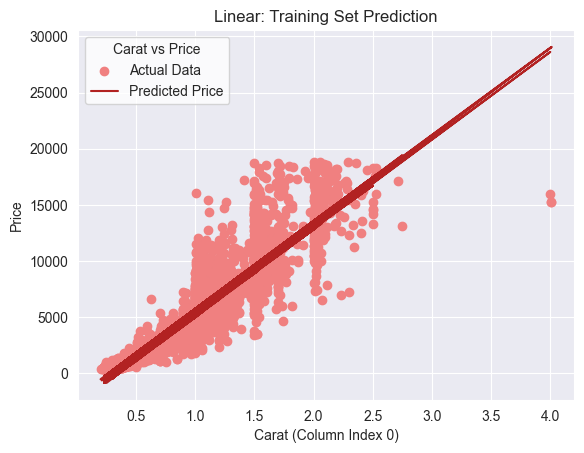

In [17]:
# Prediction on test set
plt.scatter(xtest[:, 0], ytest, color = 'lightcoral', label='Actual Data')
plt.plot(xtest[:, 0], y_pred_test, color = 'firebrick', label='Predicted Price')
plt.title('Linear: Training Set Prediction')
plt.xlabel('Carat (Column Index 0)')
plt.ylabel('Price')
plt.legend(title='Carat vs Price', loc='best', facecolor='white')
plt.show()

In [18]:
# Regressor coefficients and intercept
print(f'Coefficient: {Regressor.coef_}')
print(f'Intercept: {Regressor.intercept_}')

Coefficient: [ 7.50848204e+03 -1.79985514e+02  1.92420627e+00]
Intercept: -1905.7472060660639
